In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/d1_clean.csv')
#data = data.drop(columns=['time'])

X_raw = data.values
X_onebatch = X_raw[:,2:3]
print(X_onebatch.shape)

n = 1440

X = np.array([X_onebatch[i:i+n] for i in range(0, len(X_onebatch)-n+1, n) if i + n <= len(data)])
X = np.transpose(X, (0, 2, 1))

print(X.shape)

(347558, 1)
(241, 1, 1440)


In [2]:
from _Utility import make_batches_with_ToD
import numpy as np
import pandas as pd

fi = 518

data = pd.read_csv('spx_full.csv')
X = data.iloc[:, fi].values

batches, bri = make_batches_with_ToD(X, 510, 900)

IndexError: invalid index to scalar variable.

In [4]:
import matplotlib.pyplot as plt

def plot_best_matches(top_k_search, best_matches):
    """Plot the top best matches of a query in a dataset."""
    fig, ax = plt.subplots(figsize=(20, 5), ncols=3)
    for i_k, (id_sample, id_timestamp) in enumerate(best_matches):
        # plot the sample of the best match
        ax[i_k].plot(top_k_search.X_[id_sample, 0], linewidth=2)
        # plot the location of the best match on it
        ax[i_k].plot(
            range(id_timestamp, id_timestamp + q.shape[1]),
            top_k_search.X_[id_sample, 0, id_timestamp : id_timestamp + q.shape[1]],
            linewidth=7,
            alpha=0.5,
            color="green",
            label="best match location",
        )
        # plot the query on the location of the best match
        ax[i_k].plot(
            range(id_timestamp, id_timestamp + q.shape[1]),
            q[0],
            linewidth=5,
            alpha=0.5,
            color="red",
            label="query",
        )
        ax[i_k].set_title(f"best match {i_k}")
        ax[i_k].legend()
    plt.show()


def plot_matrix_profile(X, mp, i_k):
    """Plot the matrix profile and corresponding time series."""
    fig, ax = plt.subplots(figsize=(20, 10), nrows=2)
    ax[0].set_title("series X used to build the matrix profile")
    ax[0].plot(X[0])  # plot first channel only
    # This is necessary as mp is a list of arrays due to unequal length support
    # as it can have different number of matches for each step when
    # using threshold-based search.
    ax[1].plot([mp[i][i_k] for i in range(len(mp))])
    ax[1].set_title(f"Top {i_k+1} matrix profile of X")
    ax[1].set_ylabel(f"Dist to top {i_k+1} match")
    ax[1].set_xlabel("Starting index of the query in X")
    plt.show()

In [5]:
import numpy as np
import copy

sample_num = 5
si_start	=	540
si_lngth	=	50

# We will use the fourth sample an testing data
X_test = X[sample_num]
mask = np.ones(X.shape[0], dtype=bool)
mask[sample_num] = False
# Use this mask to exluce the sample from which we will extract the query
X_train = X[mask]

q = X_test[:, si_start:si_start+si_lngth]
plt.plot(q[0])
plt.show()
plt.plot(X_test[:, si_start:min(n,si_start+(si_lngth*4))][0])
plt.axvline(si_lngth)
plt.show()

X_train.shape

#for i in mask:
#    print(i)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [40]:
from aeon.similarity_search import QuerySearch

# Here, the distance function (distance and normalise arguments)
top_k_search = QuerySearch(k=3, distance="euclidean")
# Call fit to store X_train as the database to search in
top_k_search.fit(X_train)
distances_to_matches, best_matches = top_k_search.predict(q)
for i in range(len(best_matches)):
    print(f"match {i} : {best_matches[i]} with distance {distances_to_matches[i]} to q")

match 0 : [  2 914] with distance 13.68849882200382 to q
match 1 : [  2 669] with distance 13.842868199907128 to q
match 2 : [  4 897] with distance 13.867678248358663 to q


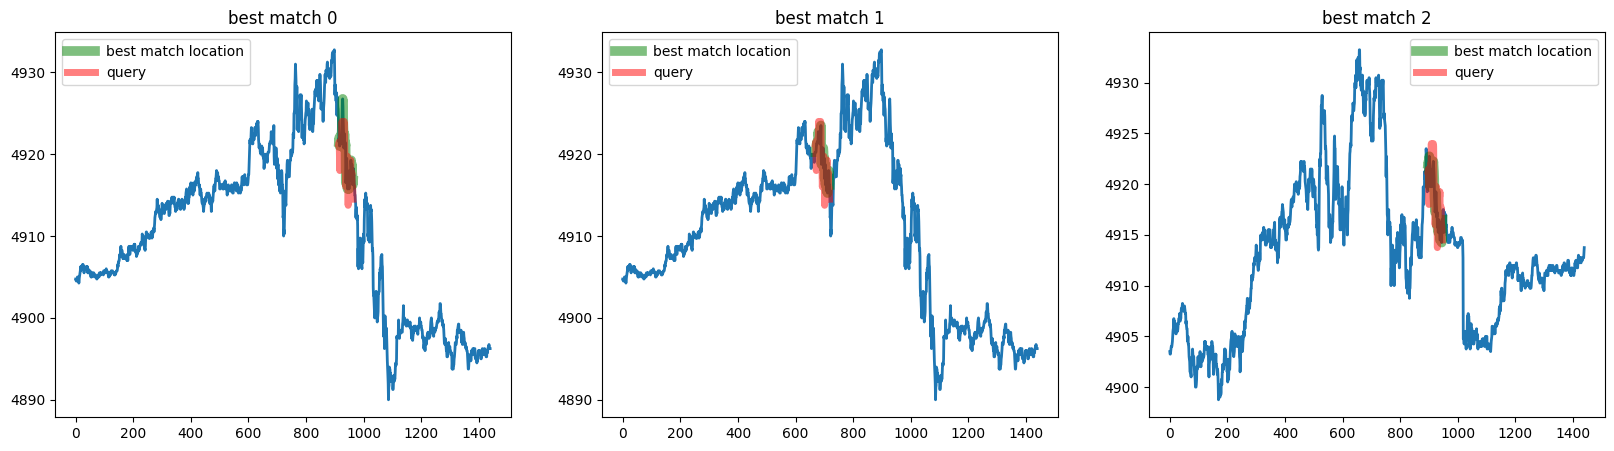

In [41]:
plot_best_matches(top_k_search, best_matches)

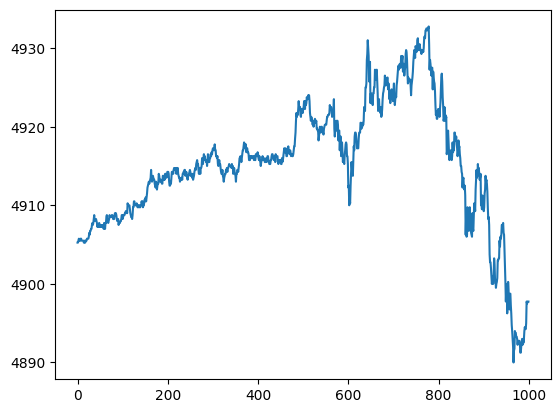

In [21]:
plt.plot(X[3][0])